### Setup

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# setup

from setup.equation_processor import EquationProcessor
from setup.method_processor import MethodProcessor
import pandas as pd
import copy


UID = "800547376"


RANK_TYPE = "5"
# RANK_TYPE = "4"


equation = EquationProcessor(UID, RANK_TYPE)
method = MethodProcessor()

In [53]:
pd.DataFrame(equation.data.cleaned_data)

,id,gacha_type,gacha_id,item_id,item_type,rank_type,total_warp,total_r5,get_rate_r5,win_rate_r5,...,status_r5,is_r4_rate_on,is_r5_rate_on,year,month,date,weekday,hour,minute,datetime
0,1715573400000216376,1,1001,20019,Light Cone,3,1,0,0.00,0.00,...,0,0,0,2024,5,13,0,12,28,2024-05-13 12:28:12
1,1715613000000138376,1,1001,20014,Light Cone,3,2,0,0.00,0.00,...,0,0,0,2024,5,13,0,23,8,2024-05-13 23:08:11
2,1715649000000439076,1,1001,20012,Light Cone,3,3,0,0.00,0.00,...,0,0,0,2024,5,14,1,9,57,2024-05-14 09:57:07
3,1716527400000119076,1,1001,20005,Light Cone,3,4,0,0.00,0.00,...,0,0,0,2024,5,24,4,13,50,2024-05-24 13:50:54
4,1716988200000061176,1,1001,20015,Light Cone,3,5,0,0.00,0.00,...,0,0,0,2024,5,29,2,21,1,2024-05-29 21:01:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,1733807400000148676,12,3051,21010,Light Cone,4,119,2,0.02,1.00,...,0,0,0,2024,12,10,1,13,22,2024-12-10 13:22:31
647,1733807400000150376,12,3051,20009,Light Cone,3,120,2,0.02,1.00,...,0,0,0,2024,12,10,1,13,23,2024-12-10 13:23:00
648,1733807400000151776,12,3051,20008,Light Cone,3,121,2,0.02,1.00,...,0,0,0,2024,12,10,1,13,23,2024-12-10 13:23:04
649,1733807400000152076,12,3051,20008,Light Cone,3,122,2,0.02,1.00,...,0,0,0,2024,12,10,1,13,23,2024-12-10 13:23:07


In [54]:
pd.set_option("display.max_colwidth", None)
eq = pd.DataFrame(copy.deepcopy(equation.equation_data))
eq.drop("equation data", axis=1)

,gacha type,equation string,MAE,R-squared,Diagonal Dominant
0,1,month = 8.80 + (1.62 * total_warp) + (-0.15 * total_r5) + (0.58 * total_r4),0.234353,0.984679,True
1,11,month = 6.06 + (-0.09 * total_warp) + (-0.01 * total_r5) + (0.81 * total_r4),0.191612,0.905129,False
2,12,month = 7.66 + (1.85 * total_warp) + (-0.29 * total_r5) + (-0.28 * total_r4),0.311828,0.926627,False


In [55]:
equation.modify_sort_equation([0, 2, 1])
eq = pd.DataFrame(copy.deepcopy(equation.equation_data))
eq.drop("equation data", axis=1)

,gacha type,equation string,MAE,R-squared,Diagonal Dominant
0,1,month = 8.80 + (1.62 * total_warp) + (-0.15 * total_r5) + (0.58 * total_r4),0.234353,0.984679,True
1,12,month = 7.66 + (1.85 * total_warp) + (-0.29 * total_r5) + (-0.28 * total_r4),0.311828,0.926627,False
2,11,month = 6.06 + (-0.09 * total_warp) + (-0.01 * total_r5) + (0.81 * total_r4),0.191612,0.905129,True


In [56]:
eq_data = pd.DataFrame(equation.equation_data)["equation data"]
A, b = equation.prep_equation(eq_data)

### Using Jacobi

In [57]:
jacobi = method.jacobi(A, b)
jacobi

,iteration,Total_warp,Total_r5,Total_r4,error,status
0,1,5.433127,-26.174127,7.516207,26.174127,Ongoing
1,2,0.372620,0.919252,7.675421,27.093379,Ongoing
2,3,2.771289,-31.150180,7.575133,32.069432,Ongoing
3,4,-0.099460,-15.925648,7.282615,15.224532,Ongoing
4,5,1.385038,-33.752734,7.223156,17.827086,Ongoing
5,6,-0.209457,-24.333000,7.077850,9.419734,Ongoing
6,7,0.696272,-34.251051,7.061867,9.918051,Ongoing
7,8,-0.196936,-28.523215,6.990168,5.727836,Ongoing
8,9,0.347851,-34.088388,6.989193,5.565173,Ongoing
9,10,-0.156201,-30.651395,6.953148,3.436994,Ongoing


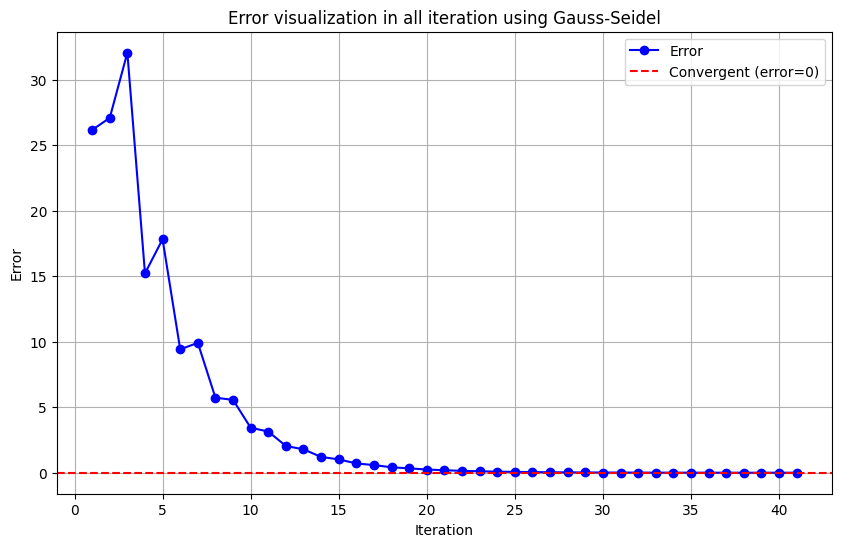

In [58]:
method.visualize(jacobi)

### Using Gauss-Seidel

In [59]:
gauss_seidel = method.gauss_seidel(A, b)
gauss_seidel

,iteration,Total_warp,Total_r5,Total_r4,error,status
0,1,5.433127,8.093511,8.281482,8.281482,Ongoing
1,2,3.204769,-13.865835,7.637944,21.959346,Ongoing
2,3,1.444644,-24.352971,7.250921,10.487136,Ongoing
3,4,0.632562,-29.105494,7.073878,4.752523,Ongoing
4,5,0.265137,-31.253919,6.993808,2.148425,Ongoing
5,6,0.099051,-32.225020,6.957615,0.971101,Ongoing
6,7,0.023980,-32.663961,6.941255,0.438941,Ongoing
7,8,-0.009952,-32.862363,6.933861,0.198403,Ongoing
8,9,-0.025290,-32.952042,6.930519,0.089679,Ongoing
9,10,-0.032223,-32.992577,6.929008,0.040535,Ongoing


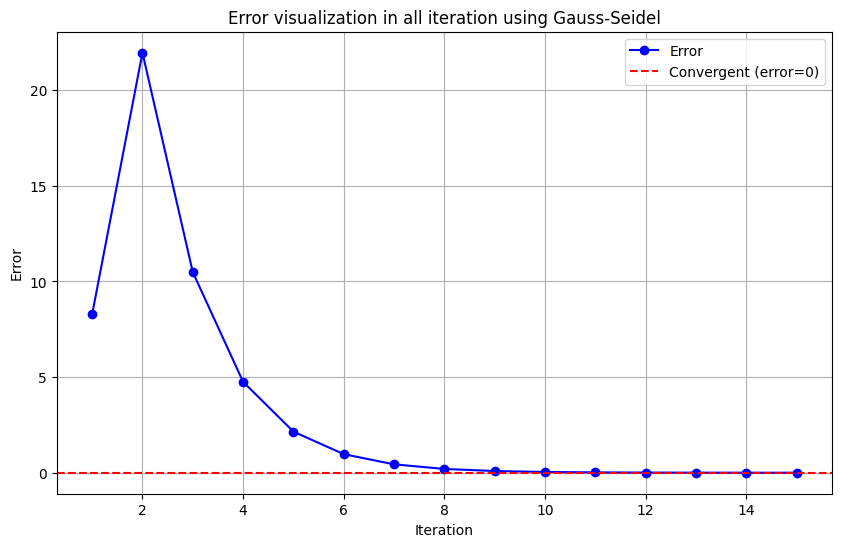

In [60]:
method.visualize(gauss_seidel)